![title](../imgs/xkcd-nlp.png)

# Bem vindos !


<img src="../imgs/que-bom.jpg" width="600">

# Warmup & Expectations !


O que vocês esperam da aula de Hoje?

<img src="https://media.giphy.com/media/1fgJxK3m5umCgfWREz/giphy.gif" width="400">

# Lets go !

<img src="https://media.giphy.com/media/5xaOcLGm3mKRQuDYCgU/giphy.gif" width="500">

# O que vamos aprender hoje?

## O que é NLP?

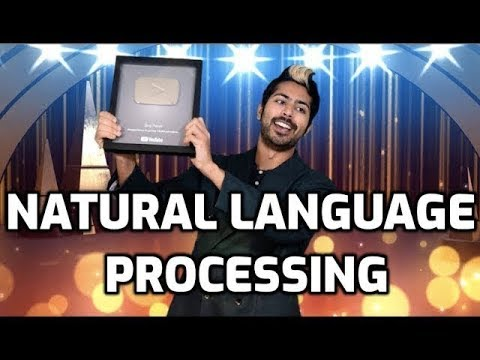

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo("bDxFvr1gpSU", start=55, end=329)

## Então, o que é NLP? 


Contem pra mim :)

<img src="https://media.giphy.com/media/mucJbtydzALRvRX5m5/giphy.gif" width="250">

Vocês conseguem pensar em exemplos?

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

### Um pouco mais de contexto 

![title](../imgs/nlp-areas.png)


O termo NLP (Natural Laguage Processing, ou Processamento de Linguagem Natural em tradução livre) é um campo da computação relativamente novo e que tem como principal foco fazer com que as máquinas entendam e até possam se comunicar em linguagem humana. É uma área de pesquisa/atuação extremamente ampla, podendo se dividir em ramos com atuações muito diferentes. Alguns dos principais exemplos de atuação são:

- Information Retrieval: Com base em uma query do usuário, retornar o produto/documento que atenda suas expectativas (Google)
- Q&A: Com base em uma pergunta, encontrar a resposta que mais atenda ela (Watson/Jeopardy)
- Translation: entrar uma linguagem em um idioma e traduzí-la (Google Translate) 
- Chatbots (**COM MUITAS RESSALVAS**)
- Information Extraction:
![title](../imgs/avril_height.png)

## Uma área "nova" (19h35)

Como vocês viram no vídeo, a área de NLP pode ser conhecida como relativamente nova e muitos dos baselines ainda estão longes de serem batidos


Esses debates com pessoas que são "referência" da área indicam que muitas coisas de NLP ainda não possuem muito consenso. Principalmente porquê muitas coisas em NLP estão longe do estado da arte

### Computer Vision vs NLP

Essas duas áreas ganharam bastante recentemente porquê são áreas em que os principais dados "não podem ser colocados em um excel" (ou seja, não tem uma estrutura tabular), mas a diferença de avanço entre cada uma dessas áreas é muito grande:

- [NLP Challenge](https://leaderboard.allenai.org/arc/submissions/public)
- [Computer Vision Challenge](https://kobiso.github.io/Computer-Vision-Leaderboard/imagenet.html])

# O Dataset

O Dataset foi tirado do [Kaggke](https://www.kaggle.com/augustop/portuguese-tweets-for-sentiment-analysis)


> This dataset has portuguese tweets divided in positive, negative and neutral classes for sentiment polarity classification.

>In order to collect and label the positive and negative cases, the distant supervision method of using positive and negative emoticons used by Go et al. (2009) was employed.
For the neutral ones, objective text from popular newsletter accounts and specific hashtags adapted from Kouloumpis et al. (2011) were used.

Vamos dar uns 10 minutos para vocês relembrarem do dataset, darem uma explorada e aí a gente discute :)

In [92]:
import sys
sys.path.append('../code_utils/')

import collections
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from plotting import (multiple_histograms_plot, plot_confusion_matrix,
                      plot_roc, predictions_hist)
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm_notebook

In [3]:
pd.set_option('display.max_colwidth', 140)
sns.set_context("notebook", font_scale=1.5)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 6
df = pd.read_csv('../data/Train3Classes.csv' , delimiter=';')
df['sentiment'] = df['sentiment'].map({0: 'negative', 1: 'positive', 2: 'neutral'})
df.set_index('id', inplace=True)

In [4]:
df.head()

,tweet_text,tweet_date,sentiment,query_used
id,,,,
1050785521201541121,@Laranjito76 A pessoa certa para isso seria o vale e azevedo :),Fri Oct 12 16:29:25 +0000 2018,positive,:)
1050785431955140608,"@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)",Fri Oct 12 16:29:04 +0000 2018,positive,:)
1050785401248645120,Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina https://t.co/5RjhKnj0oh Alguem te...,Fri Oct 12 16:28:56 +0000 2018,positive,:)
1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar t...",Fri Oct 12 16:28:49 +0000 2018,positive,:)
1050785368902131713,Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida...,Fri Oct 12 16:28:49 +0000 2018,positive,:)


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-



## O que vocês descobriram? 



<img src="https://media.giphy.com/media/f9ShyvVgY1sGVlXKDg/giphy.gif" width="400">

In [5]:
X = df[['tweet_text', 'query_used']]
y = df['sentiment']

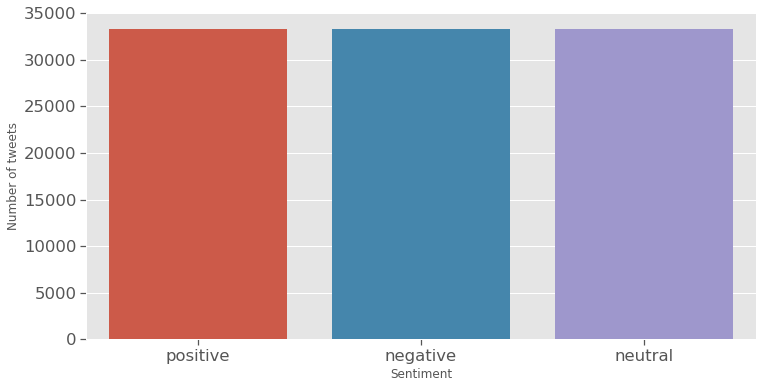

In [6]:
fig = sns.countplot(df['sentiment'])
fig.set(xlabel='Sentiment', ylabel='Number of tweets')    
plt.show()

###### Dados balanceados, o que é muito bacana :)

# Análise de Sentimento? 


![title](../imgs/sentiment-analysis.jpg)

 TL DR: Análise de Sentimentos pode ser entendido como a área que usa Machine Learning como um problema de classificação em cima de dados textuais. Os dados são apenas textos, todo o processo de Feature Engineering é em cima do texto e as classes são os sentimentos.
 
 Em outras palavras: feature engineering em cima de texto em um problema de classificação

# Data cleaning

Antes de começarmos a brincar com os dados, temos que fazer uma limpeza rápida para não enviesar nossas análises.

## Data Leakage

Um erro muito comum que pode acontecer quando estamos manipulando os nossos dados é termos dados no conjunto de features que tem uma **ligação direta** com a variável resposta. Um exemplo clássico disso é se estamos trabalhando com dados temporais e por algum descuido, meu dado no conjunto de teste contém uma informação de 2016 e eu tenho uma informação de 2018 no meu dado de treino. Isto é, **estou usando o futuro para prever o passado**

Como estamos trabalhando com um dataset tirado do mundo real, ele teve que ser construido de alguma forma. Assim,  no caso do conjunto de dados que nós iremos trabalhar usou queries especificas para formar as labels, como uma espécie de mapeamento. Se essas informações tiverem nos dados, o modelo vai simplesmente associar a query usada com a label específica, o que não ajuda muito.

**Queremos aprender que tipo de frases estão associadas a um sentimento; Não se um ":)" representa se é positivo ou negativo. Isso a gente já sabe**

Então a primeira coisa que vamos fazer é tirar essas frases do conjunto




<img src="https://media.giphy.com/media/lptFrLoRU4pcC2Bc9W/giphy.gif" width="400">

## Introduzindo regex :)  

> A regular expression is a special text string for describing a search pattern. You can think of regular expressions as wildcards on steroids. You are probably familiar with wildcard notations such as *.txt to find all text files in a file manager. The regex equivalent is .*\.txt

[Fonte](https://www.regexbuddy.com/regex.html)

Em outras palavras são um conjunto de regras que aplicaremos nos nossos textos. Primeiro queremos descobrir que palavras não queremos ter

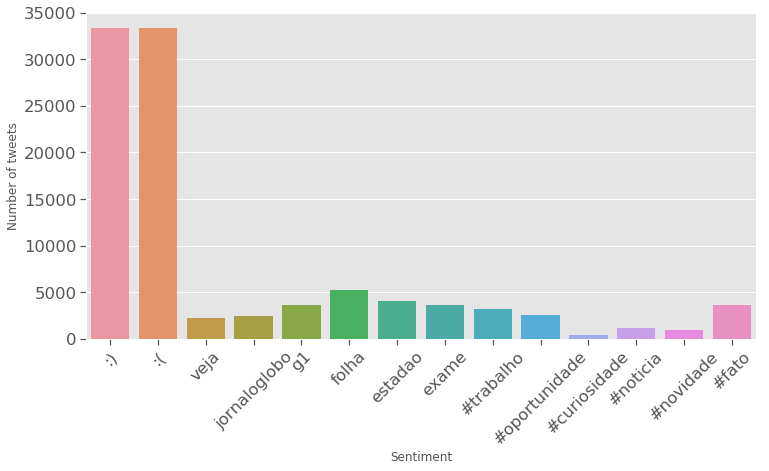

In [7]:
fig = sns.countplot(X['query_used'])
fig.set(xlabel='Sentiment', ylabel='Number of tweets') 
_ = fig.set_xticklabels(fig.get_xticklabels(), rotation=45)

In [8]:
import re

In [9]:
regex = ('(\:\)|\:\(|veja|jornalglobo|'
         '\:D|D\:'
        'g1|folha|estadao|exame|#trabalho'
        '|#oportunidade|#curiosidade|#noticia|#novidade|#fato)'
        )
regex

'(\\:\\)|\\:\\(|veja|jornalglobo|\\:D|D\\:g1|folha|estadao|exame|#trabalho|#oportunidade|#curiosidade|#noticia|#novidade|#fato)'

In [10]:
display(re.findall(regex, X.iloc[1,0]))
display(re.findall(regex, X.iloc[90000,0]))

[':)', ':)']

['#oportunidade']

In [11]:
display(X.iloc[1,0])
display(X.iloc[90000,0])

'@behin_d_curtain Para mim, é precisamente o contrário :) Vem a chuva e vem a boa disposição :)'

'#Vaga para Perito(a) de Sinistro detalhes e envio de cv em: https://t.co/780A30IGhW #oportunidade #emprego'

In [12]:
X.loc[:, 'tweet_text'] = X['tweet_text'].str.replace(regex, '')

/Users/abarbosa/miniconda3/envs/tera-env/lib/python3.6/site-packages/pandas/core/indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value


In [13]:
display(X.iloc[1,0])
display(X.iloc[90000,0])

'@behin_d_curtain Para mim, é precisamente o contrário  Vem a chuva e vem a boa disposição '

'#Vaga para Perito(a) de Sinistro detalhes e envio de cv em: https://t.co/780A30IGhW  #emprego'

Isso parece meio complicado, né?

Mas não é ! Porém, regex precisa de bastante prática para aprender e, então, vou dar uns 20 minutos para vocês praticar um pouco:

https://regexone.com/

E tem mais algumas dicas no pós aula :)

## Um pouco mais de regex 


Que outros tipos de pré processamento vocês acham que dá pra fazer?

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

#### Pré processamento

Algumas coisas que podemos considerar sugeira nos nossos dados é tudo aquilo que pode ser único no dataset: URLS ou citações. Preencha a função `remove_regex` que dado um pattern de regex e uma series do pandas remove qualquer ocorrencia desse pattern da series

HINT: Todos os tweets que eu chequei tem esse formato: "https://t.co/fD38olJTTu"

In [14]:
index_list =  [1044244786948055040,
                      1047115945058144257,
                      1047441920967016448,
                      1046785713411432451
                     ] 

In [15]:
X.loc[X.index.isin(index_list)]

,tweet_text,query_used
id,,
1047441920967016448,"@_uglybefore acabou não dando tempo pra ver filme ontem, mas vou ver hoje!! valeu pela recomendação",:)
1046785713411432451,"@melinwonderland @femingoss @YouTube eu já viiii, adoro a fe, ela é uma fofa e muito inspiradoraa hehe",:)
1047115945058144257,CVM analisa acordo em que Qualicorp dá R$ 150 mi a seu fundador https://t.co/6Cn2Yfcm44,veja
1044244786948055040,Venha conferir as novidades Summer Verão 2019. #verao😍 #santalollamcp❤ https://t.co/OyBMex4Jkg,#novidade


In [16]:
def remove_regex(df_series, regex):
    # COMPLETE AQUI

    return 

In [18]:
regex_citations = "(@\w+)+"

In [19]:
regex_urls = "http[s]?://\w+(\.com?|\.br)(/\w+)*"

In [20]:
X_new = X.copy()

In [21]:
X_new.loc[:, 'tweet_text'] = remove_regex(X['tweet_text'], regex_citations)

In [22]:
X_new.loc[:, 'tweet_text'] = remove_regex(X_new['tweet_text'], regex_urls)

In [23]:
X_new.loc[X_new.index.isin(index_list)]

,tweet_text,query_used
id,,
1047441920967016448,"acabou não dando tempo pra ver filme ontem, mas vou ver hoje!! valeu pela recomendação",:)
1046785713411432451,"eu já viiii, adoro a fe, ela é uma fofa e muito inspiradoraa hehe",:)
1047115945058144257,CVM analisa acordo em que Qualicorp dá R$ 150 mi a seu fundador,veja
1044244786948055040,Venha conferir as novidades Summer Verão 2019. #verao😍 #santalollamcp❤,#novidade


Note que talvez existam alguns tweets que eram só uma única URL ou menção. Vamos ver se isso é verdade

In [24]:
tmp = X_new[X_new['tweet_text'].str.len() == 0]

In [25]:
tmp.head()

,tweet_text,query_used
id,,
1050732821327826944,,veja
1050533305811128321,,folha
1050474254326800389,,veja
1050206569881845760,,folha
1050008051111972864,,veja


In [26]:
len(tmp)/len(X_new)

0.00048

Como o número é muito baixo, podemos tirar esses caras ou manter eles. Por simplicidade, vou manter :)

# EDA

Agora que tal a gente dar uma explorada no que o texto tem para nos contar?

Uma forma muito bacana de fazer isso é por meio do WordCloud :)

In [27]:
# !conda install -y -c conda-forge wordcloud 

In [28]:
from wordcloud import WordCloud

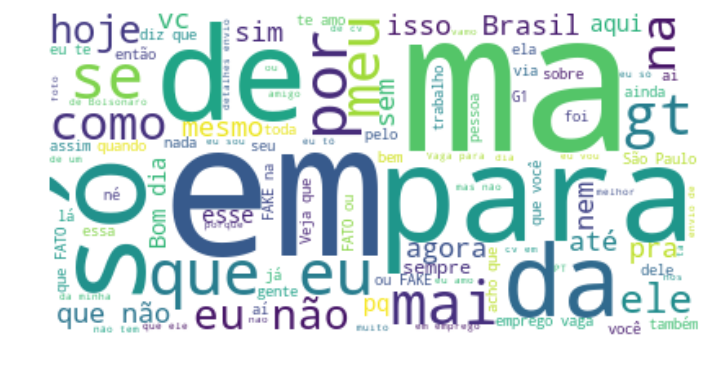

In [29]:
# Start with one review:
text = " ".join(review for review in X_new.tweet_text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Esses dados não parecem muito fáceis de ver ):

O que podemos fazer para melhorar?


-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

-

# Break

<img src="https://media.giphy.com/media/YucHVxk7WYIc8/giphy.gif" width="300">

# Pré processamento

Uma primeira coisa que podemos fazer nos nossos dados então, é remover os excessos de espaços e transformar tudo em minusculo

In [30]:
X_new.head()

,tweet_text,query_used
id,,
1050785521201541121,A pessoa certa para isso seria o vale e azevedo,:)
1050785431955140608,"Para mim, é precisamente o contrário Vem a chuva e vem a boa disposição",:)
1050785401248645120,Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina Alguem tem uma sugestao? Queria ...,:)
1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar t...",:)
1050785368902131713,Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida...,:)


In [31]:
X_new['tweet_text'].str.lower().iloc[0]

' a pessoa certa para isso seria o vale e azevedo '

In [32]:
X_new['tweet_text'].str.strip().iloc[0]

'A pessoa certa para isso seria o vale e azevedo'

In [33]:
X_new.head()

,tweet_text,query_used
id,,
1050785521201541121,A pessoa certa para isso seria o vale e azevedo,:)
1050785431955140608,"Para mim, é precisamente o contrário Vem a chuva e vem a boa disposição",:)
1050785401248645120,Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina Alguem tem uma sugestao? Queria ...,:)
1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar t...",:)
1050785368902131713,Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida...,:)


## Stopwords

Vamos dar uma olhada agora em outras formas de "filtrar" os nossos textos. Vocês perceberam que tem algumas palavras que são muito comumns nos nossos textos. Exemplos claros são palavras como `a`; `é`; `às`;`em`; `todas`; `elas`.

Contudo, vale falar que as stopwords não são obrigatórias e são relativas

> The general trend in IR systems over time has been from standard use of quite large stop lists (200-300 terms) to very small stop lists (7-12 terms) to no stop list whatsoever. Web search engines generally do not use stop lists.

Retirado do livro [Intro to Information Retrieval](https://nlp.stanford.edu/IR-book/html/htmledition/dropping-common-terms-stop-words-1.html) e da aula de NLP do fastai (referência na pós aula)

In [34]:
# !python -m spacy download pt

In [35]:
import spacy

In [36]:
nlp = spacy.load("pt")

In [37]:
doc = nlp("O rato roeu a roupa do rei de roma?")

In [38]:
for token in doc:
    print(f"Token: {token.text}, É pontuação?: {token.is_punct}, É stopword?: {token.is_stop}, POS: {token.pos_}\n")

Token: O, É pontuação?: False, É stopword?: False, POS: DET

Token: rato, É pontuação?: False, É stopword?: False, POS: NOUN

Token: roeu, É pontuação?: False, É stopword?: False, POS: VERB

Token: a, É pontuação?: False, É stopword?: False, POS: DET

Token: roupa, É pontuação?: False, É stopword?: False, POS: NOUN

Token: do, É pontuação?: False, É stopword?: True, POS: ADP

Token: rei, É pontuação?: False, É stopword?: False, POS: NOUN

Token: de, É pontuação?: False, É stopword?: True, POS: ADP

Token: roma, É pontuação?: False, É stopword?: False, POS: NOUN

Token: ?, É pontuação?: True, É stopword?: False, POS: PUNCT



In [39]:
pt_stopwords = sorted([token.text for token in nlp.vocab if token.is_stop])
pt_stopwords[30:50]

['aí',
 'baixo',
 'bastante',
 'bem',
 'boa',
 'bom',
 'breve',
 'cada',
 'caminho',
 'cedo',
 'cento',
 'certamente',
 'certeza',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido']

Lembrem-se que estamos avaliando polaridade, então existem algumas paavras que **não** queremos que sejam stopwords

Então, agora, vamos dê uma explorada na lista de stopwords do spacy e vejam quais palavras podemos remover. Salve o resultado em uma variável chamada `list_exclude`

In [41]:
# CRIE A LISTA DE EXCLUSAO DE STOPWORDS AQUI E FACA ELAS SEREM CONSIDERADAS STOPWORDS
# NAO SEREM MAIS STOPWORDS

Também podemos incluir algumas (algumas até são repetidas, eu só quis garantir)

In [101]:
list_include = set(['o', 'a', 'tá', 'ta', 'ser', 'pro', 'to', 'tô', 'vc', 'você', 'voce', 'pra',
                    'pq', 'é', 'vou', 'que','tão', 'gt', 'de', 'da', 'do', 'em', 'uma', 'lá',
                    'já', 'no', 'para', 'na', 'com', 'um', 'minha', 'se', 'isso', 'por', 'vou',
                    'os', 'isso', 'como', 'mesmo', 'tenho', 'aqui', 'ele', 'ela', 'quem', 'fazer',
                    'eu', 'só', 'ai', 'mais', 'só', 'querer'
                   ]
                  )
for w in list_include:
    nlp.vocab[w].is_stop = True

In [103]:
pt_stopwords = sorted([token.text for token in nlp.vocab if token.is_stop])
pt_stopwords[:60]

['a',
 'acerca',
 'adeus',
 'agora',
 'ai',
 'ainda',
 'algo',
 'algumas',
 'alguns',
 'ali',
 'além',
 'ambas',
 'ambos',
 'ano',
 'anos',
 'antes',
 'ao',
 'apenas',
 'apoia',
 'apoio',
 'apontar',
 'após',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aqui',
 'aquilo',
 'as',
 'assim',
 'através',
 'atrás',
 'até',
 'aí',
 'baixo',
 'breve',
 'cada',
 'caminho',
 'cedo',
 'cento',
 'cima',
 'cinco',
 'coisa',
 'com',
 'como',
 'comprida',
 'comprido',
 'conhecida',
 'conhecido',
 'conselho',
 'contra',
 'corrente',
 'custa',
 'cá',
 'da',
 'dar',
 'de',
 'debaixo',
 'demais',
 'dentro']

## Stemming e Lemma


> Lemmatization uses the rules about a language. The resulting tokens are all actual words

> "Stemming is the poor-man’s lemmatization." (Noah Smith, 2011) Stemming is a crude heuristic that chops the ends off of words. The resulting tokens may not be actual words. Stemming is faster.

(Retirado da aula do fastai)

In [45]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/abarbosa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [46]:
from nltk import stem

In [47]:
wnl = stem.WordNetLemmatizer()
porter = stem.porter.PorterStemmer()

In [48]:
word_list = ['feet', 'foot', 'foots', 'footing']
display([wnl.lemmatize(word) for word in word_list])
display([porter.stem(word) for word in word_list])

['foot', 'foot', 'foot', 'footing']

['feet', 'foot', 'foot', 'foot']

O Spacy não implementa uma função de Stemming, apenas lemma. Então é ela que vamos utilizar

Da pra ver que algumas dessas regras são um pouco "agressivas" e podem alterar o signifaco da palavra. Então, no caso de português, talvez valha mais a pena usarmos **apenas** se a palavra for um verbo. Como o modelo de português é bastante simples, é melhor fazer e, se houver muitos plurais (no caso de nomes), nós fazemos um segundo pré processamento

## Exercicio

Chegou a hora de aplicarmos o pré processamento dos nossos dados. Escreva uma função que pega um texto e, nessa ordem:
 - Se o tamanho do texto for 0, ignore (lembre dos casos que vimos mais cedo)
 - Remove o excesso de espaço
 - Transforma tudo em minúsculo
 - Para cada palavra do texto:
     - Verifica se é uma stopword OU é uma pontuação; E se for ignora
     - Pega o lema dessa palavra APENAS se for verbo
 - Forma uma nova string transformada
 
 Retorna essa string
 
 Dica:

In [49]:
lista1 = ['string1', 'string2', 'string3']
lista1

['string1', 'string2', 'string3']

In [50]:
' '.join(lista1)

'string1 string2 string3'

In [51]:
def normalize_text(text):
    ### COMPLETE

In [54]:
assert(normalize_text("O rato roeu a roupa do rei de Roma?!?!") == 'rato roer roupa rei roma')

In [55]:
new_tokens = []
for idx, row in tqdm_notebook(X_new.iterrows(), total=len(X_new)):
    new_tokens.append(normalize_text(row['tweet_text']))

In [58]:
new_tokens_arr = np.array(new_tokens)

In [59]:
X_new = X_new.assign(norm_text=new_tokens_arr)

In [97]:
X_new.head(10)

,tweet_text,query_used,norm_text
id,,,
1050785521201541121,A pessoa certa para isso seria o vale e azevedo,:),pessoa certa vale e azevedo
1050785431955140608,"Para mim, é precisamente o contrário Vem a chuva e vem a boa disposição",:),mim precisamente contrário chuva e boa disposição
1050785401248645120,Vou fazer um video hoje... estou pensando em falar um pouco sobre o novo meta do CSGO e sobre a pagina Alguem tem uma sugestao? Queria ...,:),video pensar falar meta csgo e pagina alguem sugestao querer falar cenario nacional
1050785370982547461,"aaaaaaaa amei tanto essas polaroids, nem sei expressar o quanto eu to apaixonada de vdd✨💖🎈🎉🎊 espero que outras pessoas consigam ganhar t...",:),aaaaaaaa amei polaroids expressar apaixonar vdd ✨ 💖 🎈 🎉 🎊 esperar conseguir ganhar
1050785368902131713,Valoriza o coração do menininho que vc tem. Ele é diferente. O faça sorrir e ter certeza disso ❤️ — Eu valorizo todo mundo na minha vida...,:),valorizar coração menininho diferente faça sorrir e certeza d ❤ ️ valorizar mundo vida não diferente
1050785368008781825,mas amiga eu to aqui ainda,:),amigo
1050785350724014080,"Bravo, Jairo!!! ))",:),bravo jairo
1050785336551444480,socorro ksoaksosks acho que é porque to usando na caixinha de som :p,:),socorro ksoaksosks achar usar caixinha som :p
1050785297028603905,"gosto muito de fazenda , mas morro de medo de galinha kkkkkkk",:),gosto fazenda morro medo galinha kkkkkkk


Vamos ver se as palavras agora fazem mais sentido?

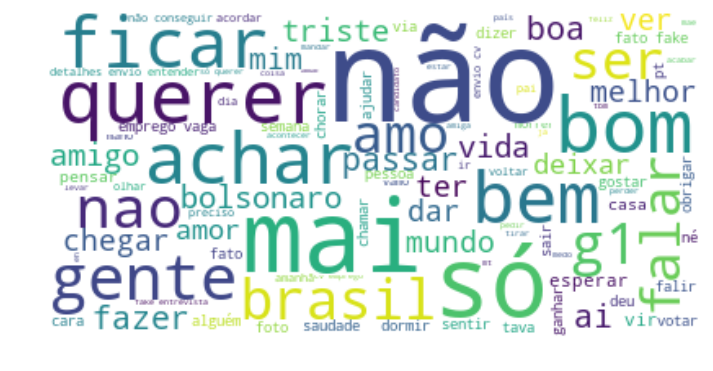

In [61]:
# Start with one review:
text = " ".join(review for review in X_new.norm_text)

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Faz um pouco mais de sentido, né?

# Colocando Machine Learning

## Os computadores só entendem números ):

Depois de todo esse trabalho de pré processamento, podemos finalmente nos dedicar ao modelos. Mas ué como que fazemos esses textos features?

Lembrem-se sempre. Computadores entendem apenas números. O que temos que fazer, então, é transformar os nossos dados em números !

Mas como??? E se usássemos um dicionário?

In [62]:
examples_for_bow = [
    'camisa preta botao botao botao',
    'botao feito linha preta',
    'considera-se caro preco botao camisa botao',
    'linha costurar botão mesma camisa',
    'costurar linha camisa mesma botao'
]

In [63]:
from sklearn.feature_extraction.text import CountVectorizer

#estamos selecionando até 5 features em uma forma de BagOfWords
cv = CountVectorizer(max_features=5, 
                     strip_accents='unicode',
                     binary=True,
                    )

bow_matrix = cv.fit_transform(examples_for_bow)
bow_matrix

<5x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [64]:
bow_matrix.todense()

matrix([[1, 1, 0, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]], dtype=int64)

In [65]:
pd.DataFrame(bow_matrix.todense(), columns=sorted(cv.vocabulary_.items(), key=lambda item: item[1]))

,"(botao, 0)","(camisa, 1)","(costurar, 2)","(linha, 3)","(mesma, 4)"
0,1,1,0,0,0
1,1,0,0,1,0
2,1,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


In [66]:
cv = CountVectorizer(max_features=5, 
                     strip_accents='unicode',
                     binary=False,
                    )

bow_matrix = cv.fit_transform(examples_for_bow)
pd.DataFrame(bow_matrix.todense(), columns=sorted(cv.vocabulary_.items(), key=lambda item: item[1]))

,"(botao, 0)","(camisa, 1)","(costurar, 2)","(linha, 3)","(mesma, 4)"
0,3,1,0,0,0
1,1,0,0,1,0
2,2,1,0,0,0
3,1,1,1,1,1
4,1,1,1,1,1


## Train Test Split (21h25)

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_new['norm_text'],y, test_size=0.2)

In [105]:
y_train.head()

id
1047402859191525376    positive
1045351378388955138    positive
1049770225955008513     neutral
1046792827714392066    positive
1045498600745291777    positive
Name: sentiment, dtype: object

## Habemus modelo !

In [106]:
X_train.head()

id
1047402859191525376                     triste casa amigos e vida d boa e feliz fudida e família merda
1045351378388955138                                   hahahahahahahahahahaha bugou cérebro imaginar ia
1049770225955008513    caso letícia suspeito matar filha facadas voltar crime comida polícia   g1 g1sp
1046792827714392066                                                              mim macaca mais linda
1045498600745291777                                  olho e cabeça começam doer mt e dps fico tonto :p
Name: norm_text, dtype: object

In [107]:
count = CountVectorizer()
X_train = count.fit_transform(X_train)
X_test = count.transform(X_test)

In [108]:
count.vocabulary_

{'triste': 49127,
 'casa': 10778,
 'amigos': 4665,
 'vida': 50854,
 'boa': 8460,
 'feliz': 21476,
 'fudida': 22835,
 'família': 21070,
 'merda': 32636,
 'hahahahahahahahahahaha': 24813,
 'bugou': 9499,
 'cérebro': 14677,
 'imaginar': 26190,
 'ia': 25884,
 'caso': 10828,
 'letícia': 29974,
 'suspeito': 46944,
 'matar': 32069,
 'filha': 21780,
 'facadas': 20839,
 'voltar': 51357,
 'crime': 14202,
 'comida': 12745,
 'polícia': 39062,
 'g1': 23073,
 'g1sp': 23102,
 'mim': 33052,
 'macaca': 31026,
 'mais': 31257,
 'linda': 30227,
 'olho': 36097,
 'cabeça': 9751,
 'começam': 12720,
 'doer': 17270,
 'mt': 33939,
 'dps': 17521,
 'fico': 21706,
 'tonto': 48524,
 'deputado': 15604,
 'trem': 49008,
 'descarrila': 15778,
 'central': 11193,
 'brasil': 9134,
 'rio': 43021,
 'qué': 41291,
 'amar': 4531,
 'eh': 18202,
 'seja': 44566,
 'sangue': 44009,
 'não': 35663,
 'chineses': 11671,
 'hora': 25563,
 'tencent': 47759,
 'investir': 27479,
 'us': 49984,
 '145': 276,
 'milhões': 33011,
 'redar': 41948,

In [109]:
from lightgbm import LGBMClassifier

In [110]:
%%time
lgb_classfier = LGBMClassifier()
lgb_classfier.fit(X_train.astype('float32'),y_train)

CPU times: user 36.3 s, sys: 204 ms, total: 36.5 s
Wall time: 4.82 s


In [111]:
y_pred = lgb_classfier.predict(X_test.astype('float32'))

In [112]:
index_labels=('Negative (truth)','Neutral (truth)','Positive (truth)')
columns_labels=('Negative (pred)','Neutral (truth)','Positive (pred)')

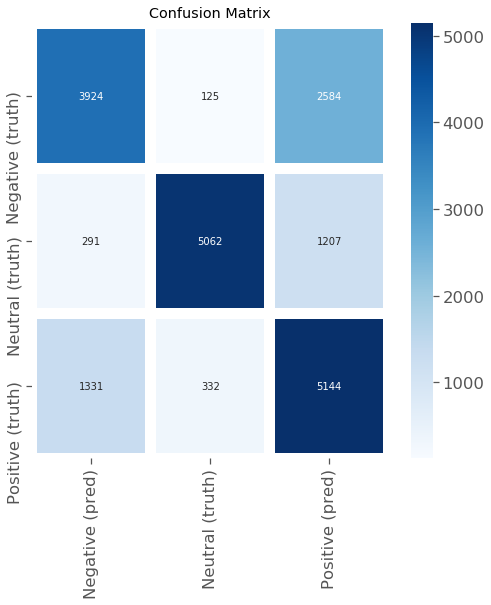

In [113]:
plot_confusion_matrix(y_test, y_pred, index_labels, columns_labels)

In [114]:
#acuracia
np.mean(y_test==y_pred)

0.70650000000000002

In [115]:
print(classification_report(y_test, y_pred, target_names=lgb_classfier.classes_))

             precision    recall  f1-score   support

   negative       0.71      0.59      0.64      6633
    neutral       0.92      0.77      0.84      6560
   positive       0.58      0.76      0.65      6807

avg / total       0.73      0.71      0.71     20000



In [116]:
logreg = LogisticRegression(random_state=42)

In [117]:
%%time
logreg.fit(X_train,y_train)

CPU times: user 12.3 s, sys: 85.3 ms, total: 12.3 s
Wall time: 3.19 s


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [118]:
y_pred = logreg.predict(X_test)

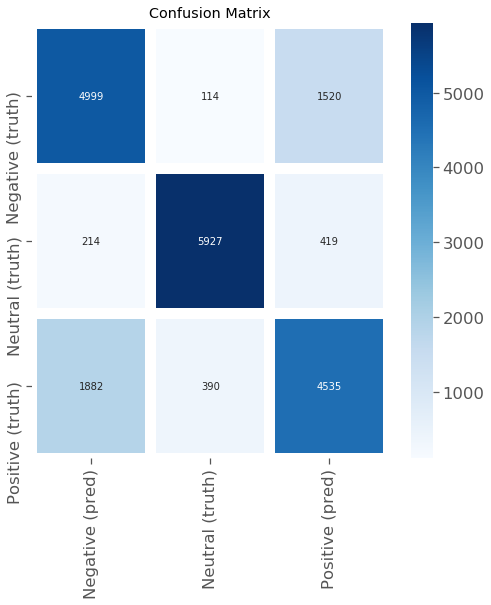

In [119]:
plot_confusion_matrix(y_test, y_pred, index_labels, columns_labels)

In [120]:
#acuracia
np.mean(y_test==y_pred)

0.77305000000000001

In [121]:
print(classification_report(y_test, y_pred, target_names=logreg.classes_))

             precision    recall  f1-score   support

   negative       0.70      0.75      0.73      6633
    neutral       0.92      0.90      0.91      6560
   positive       0.70      0.67      0.68      6807

avg / total       0.77      0.77      0.77     20000



## Wait, what ?!

<img src="https://media.giphy.com/media/RkzMtKbCKFUY3wYRMy/giphy.gif" width="400">

Como vocês puderam ver, o tipo de dado que a gente gera é extremamente **esparso** e, logo, tem muitas dimensões. Pela forma como árvores são feitas, um número alto de dimensão (e esparsidade) faz com que ela geralmente performe pior do que a regressão logística ou redes neurais, para esse tipo de tarefa

# Melhorando o Modelo 

A primeira coisa que pode ser interessante é considerar uma frequência "mínima" e máxima de palavras que apareçam nos tweets

## Ngrams

Algumas vezes, palavras não tem o seu significado sozinho. Por exemplo, "bom dia" tem um significado diferente do que "bom" e "dia" se consideradas separadamente. A ideia é que um "n-grama" é um grupo de n palavras que "forma" uma nova palavra. Por exemplo, "O rato roeu a roupa do rei de Roma" tem como tri gramas as seguintes palavras:

- O rato roeu
- rato roeu a 
- roeu a roupa
- a roupa do 
- roupa do rei
- do rei de
- rei de Roma

## TfxIdf

Se uma palavra aparece 10 vezes mais do que outra não quer dizer que ela é 10 vezes mais importante do que outra. Uma  forma de tentar ponderar isso é considerar **também** o aparecimento dessa palavra em relação a **todos** os documentos (no caso, tweets). Ela é calculada da seguinte forma:

$tf \times idf = tf \times log(\frac{n}{df})$

Em que **tf** é a frequência do termo em um documento, **df** é a frequência do termo em todos os documentos e **n** é o número de documentos.

> Consider a document containing 100 words wherein the word cat appears 3 times. The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.
[Fonte](http://www.tfidf.com/)

In [132]:
from sklearn.feature_extraction.text import TfidfVectorizer
X_train, X_test, y_train, y_test = train_test_split(X_new['norm_text'],y, test_size=0.2,random_state=1)
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=3, max_features=100000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [133]:
X_train_tfidf

<80000x43149 sparse matrix of type '<class 'numpy.float64'>'
	with 669066 stored elements in Compressed Sparse Row format>

In [134]:
tfidf.vocabulary_

{'blog': 6209,
 'preciso': 32468,
 'instalar': 21645,
 'antivírus': 3926,
 'macos': 24158,
 'tirar': 39665,
 'dúvidas': 14039,
 'deep': 12080,
 'web': 42604,
 'g1': 18844,
 'tirar dúvidas': 39675,
 'deep web': 12081,
 'web g1': 42605,
 'jovem': 22546,
 'brasileira': 7189,
 'desaparecido': 12483,
 'itália': 22060,
 'localizar': 23783,
 'ex': 16267,
 'presidente': 32705,
 'dersa': 12447,
 'laurence': 23100,
 'casagrande': 8442,
 'deixa': 12130,
 'presídio': 32810,
 'táxi': 40644,
 'ex presidente': 16298,
 'presidente dersa': 32724,
 'laurence casagrande': 23101,
 'ex presidente dersa': 16299,
 'gato': 19158,
 'chato': 8917,
 'preferir': 32558,
 'lhe': 23421,
 'miminhos': 26178,
 'atenção': 4742,
 'all': 3104,
 'the': 39538,
 'time': 39611,
 'sozinha': 37839,
 'all the': 3107,
 'the time': 39549,
 'ksksks': 22920,
 'eita': 14331,
 'igual': 20993,
 'hoseok': 20730,
 'ai': 2646,
 'condições': 10230,
 'rui': 35810,
 'bom': 6734,
 'vcs': 41290,
 'falar': 16746,
 'querer': 33856,
 'não': 28287

# Modelo Final

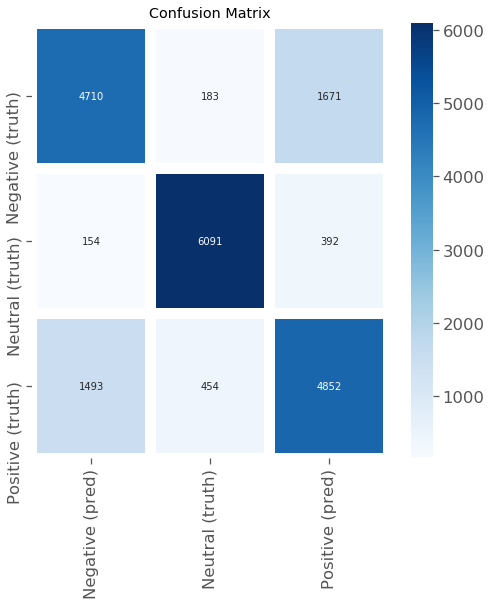

In [135]:
logreg = LogisticRegression(random_state=42)

logreg.fit(X_train_tfidf,y_train)

y_pred = logreg.predict(X_test_tfidf)

plot_confusion_matrix(y_test, y_pred, index_labels, columns_labels)

In [136]:
np.mean(y_test==y_pred)

0.78264999999999996

In [137]:
print(classification_report(y_test, y_pred, target_names=logreg.classes_))

             precision    recall  f1-score   support

   negative       0.74      0.72      0.73      6564
    neutral       0.91      0.92      0.91      6637
   positive       0.70      0.71      0.71      6799

avg / total       0.78      0.78      0.78     20000



In [158]:
counter = TfidfVectorizer()
neg = counter.fit_transform(X_test[X_test.index.isin(
    np.array(y_test[logreg.predict(X_test_tfidf)=='negative'].index))])

word_list = counter.get_feature_names();  
count_list = neg.toarray().sum(axis=0)
word_dict = dict(zip(word_list,count_list))
word_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:50]
word_dict

[('não', 298.69982753365127),
 ('querer', 176.03574324160024),
 ('mais', 119.4137211577644),
 ('só', 118.88253201239266),
 ('triste', 118.7973421207473),
 ('amo', 106.24985232558662),
 ('ficar', 97.434485382061013),
 ('ai', 88.208247546019649),
 ('conseguir', 76.484569694903143),
 ('nao', 74.413859709920914),
 ('dormir', 70.746420051763053),
 ('gente', 68.496132747860955),
 ('amor', 68.365466820294174),
 ('achar', 65.587457234548538),
 ('sentir', 64.652208846983754),
 ('bem', 55.228213605633059),
 ('poxa', 51.799449453168457),
 ('chorar', 47.652382152181694),
 ('mim', 47.181584831207388),
 ('mt', 46.489032746867856),
 ('deus', 45.449692171479064),
 ('saudade', 43.967059754728382),
 ('dar', 41.927675562570649),
 ('mano', 41.592629746768729),
 ('lindar', 40.913167908324951),
 ('infelizmente', 40.851150311652169),
 ('mal', 40.303445307272426),
 ('tava', 39.948852031183677),
 ('tbm', 39.630835607953166),
 ('medo', 39.387830224605977),
 ('vir', 39.245326599603999),
 ('vida', 39.070094938619

In [159]:
counter = TfidfVectorizer()
neu = counter.fit_transform(X_test[X_test.index.isin(
    np.array(y_test[logreg.predict(X_test_tfidf)=='neutral'].index))])

word_list = counter.get_feature_names();  
count_list = neu.toarray().sum(axis=0)
word_dict = dict(zip(word_list,count_list))
word_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:50]
word_dict

[('bolsonaro', 121.57415100298306),
 ('g1', 117.26625000720109),
 ('fato', 97.695417543335452),
 ('mais', 89.381385215865222),
 ('não', 87.689556027655371),
 ('emprego', 87.480871394226838),
 ('haddad', 65.097076918688174),
 ('brasil', 62.593218891436642),
 ('eleições2018', 61.827160402131653),
 ('sp', 59.313553532453028),
 ('vaga', 59.01319025919787),
 ('fake', 58.968293721312961),
 ('paulo', 49.651718366494656),
 ('rio', 45.479255268754365),
 ('detalhes', 44.827945959694041),
 ('envio', 43.72340738786751),
 ('cv', 43.570390874117024),
 ('turno', 43.215144350676383),
 ('governo', 39.388324919602347),
 ('vago', 36.461523892685442),
 ('via', 35.82866763391317),
 ('alckmin', 35.799182734246671),
 ('candidatos', 35.596269821321044),
 ('debate', 34.032131156410088),
 ('entrevista', 33.687241050213728),
 ('ciro', 33.331240906215918),
 ('jornal', 32.73689035781446),
 ('eua', 31.967758297089546),
 ('presidente', 31.760256434959089),
 ('pt', 31.595389832856245),
 ('2018', 31.360684757729928),


In [160]:
counter = TfidfVectorizer()
pos = counter.fit_transform(X_test[X_test.index.isin(
    np.array(y_test[logreg.predict(X_test_tfidf)=='positive'].index))])

word_list = counter.get_feature_names();  
count_list = pos.toarray().sum(axis=0)
word_dict = dict(zip(word_list,count_list))
word_dict = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)[:50]
word_dict

[('não', 186.63716646648842),
 ('bom', 148.30321520986345),
 ('bem', 99.1797593724352),
 ('mais', 96.181846171661491),
 ('só', 87.789550502795564),
 ('boa', 73.956863155704823),
 ('feliz', 59.189720773999632),
 ('ficar', 57.923884508187385),
 ('fazer', 56.804671422668036),
 ('gostar', 55.980761702465855),
 ('falar', 53.707649276117877),
 ('achar', 52.702482968910878),
 ('melhor', 46.460632506052107),
 ('ser', 45.202383838955534),
 ('obrigar', 44.736457695545639),
 ('mandar', 43.574009282242216),
 ('passar', 42.806118347639853),
 ('esperar', 41.542268690809557),
 ('dizer', 37.494841535205829),
 ('parabéns', 37.202265501207876),
 ('chegar', 36.302032366548836),
 ('amanhã', 35.12667883269561),
 ('chamar', 35.084734465665349),
 ('semana', 34.35231081806198),
 ('dar', 33.973623295524263),
 ('oi', 33.52504466099257),
 ('gente', 32.896194078828955),
 ('dm', 32.485869678407269),
 ('votar', 32.401039923914546),
 ('querer', 32.055325471058516),
 ('ter', 31.207855450878629),
 ('casa', 30.85623828



Legal, né? :)

# You did it ! 

<img src="https://media.giphy.com/media/QmGXShnp19fAiooFqM/giphy.gif" width="300">

Na aula de hoje vocês aprendeream como fazer análise de sentimentos E como trabalhar com dados textuais :)

**mas não pensem que NLP é só isso** Lembrem-se que é uma área imensa de pesquisa e tem várias coisas que não cobrimos aqui. ALgumas delas são:

- Named Entity Recognition
- Part of Speech Tagging
- Embeddings !!!